# Module Assessment

Import required packages for notebook

In [1]:
# Data Frames.
import pandas as pd

# Machine Learning Library that contains example datasets
import sklearn as skl

# for plots
import matplotlib.pyplot as plt
import numpy as np

# seaborn required to allow for overlapping of plots
import seaborn as sns

# Scientific computing for R²
import scipy as sp


## Assessment Tasks

1. Sourcing the data set
2. Exploring the data structure
3. Summarizing the data
4. Vizualise features
5. Investigate relationships (scatter plots)
6. Analyze relationship (regression line)
7. Analyse class distribution
8. Compute correlations
9. R squared
10. Pairplot

### Task 1: Sourcing the data set

Source of data set as provided:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
# Load the iris data set using sklearn.datasets module
# Call the data 'iris'
iris = skl.datasets.load_iris()

In [3]:
# Look at the data
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Load_iris findings

While the sklearn load-iris function doesn't visually return anything, it does pull the data set from its library. Through further analysis of the dataset using the 'iris' command, it can be seen that the array which has been imported in the background, is based on 4 different measurements (feature_names); sepal length, sepal width, petal length, and petal width. For each of these variables, there are 150 samples. In addition to this, it shows that there are 3 different flower species (target_names) being measured, 50 in each.

## Task 2: Exploring the Data Structure

The data displayed above shows the shape and various aspects of the dataset however, these can also be verified through the following commands.

In [4]:
# dataset shape
iris['data'].shape

(150, 4)

Shows the data set is a 150 row by 4 column array; 150 sample measurements for each of the 4 features measured.

In [5]:
# Target Names
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Confirms the different target names (species in the case of this data set), which make up the 150 samples

In [6]:
# Feature Names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Lists the 4 features that are measured on each sample.  


As documented in the link below however, when importing the iris data through sklearn, it is not presented in a dataframe format. Dataframe is the preferred format when using pandas.
Information source: https://discuss.datasciencedojo.com/t/common-mistakes-which-occur-when-working-with-the-iris-dataset-in-python/1414

The below code used to convert the imported array into a dataframe, can be seen to specify the data (iris.data), the column headers under which the measurements were captured (iris.feature_names), and the different array for each measurement.

In [7]:
# convert the data into a DataFrame
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# capture the targets names under a new title; species
iris_df['species'] = iris.target

In [8]:
# Show the first 5 rows of the new dataframe.
# Note: defaults to 5 rows when no number is specified within the brackets.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Show the last 5 rows of the new dataframe.
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


While the dataframe can be seen to present the data in a clearer format, it is noticeable that the species is listed as integers rather than the target names. In task 1, the data shows that the target names are compiled of 0's, 1's, and 2's. For better clarity , this can be changed.

In [10]:
# convert the 'species' column to call out correct names.
# source: https://stackoverflow.com/questions/43159754/datasets-load-iris-in-python

iris_df['species'] = iris_df['species'].replace(to_replace = [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

This now allows to easily review different portions of the dataset

In [11]:
# show first 5 rows of the data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# show last 5 rows of the data
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Output Review

As a result of converting the original array to a dataframe (iris_df), the iris_df.head and iris_df.tail commands above are able to clearly present the relevant rows. In the original array, the measurements, target and feature names were provided, but structured in a manner that wasn't visually clear. Now, in the the new format, it is instantly understandable for each sample, what feature name each measurement relates to, and also the species of said sample. While the first and last 5 rows are like this, below shows the same format is carried throughout.

In [13]:
# view middle rows
# method source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
iris_df.iloc[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


# Task 3: Summarizing the Data

In [14]:
# show mean, minimum, maximum, standard deviation, and median for all 4 features

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As can be seen above, very easily for each feature, the mean, minimum measurement, maximum measurement, standard deviation, and median can be presented. Before progressing onto plots, this infomration helps give some insight into the data. An example of such is that the sepal width measurements are relatively clustered, shown by the low standard deviation. Comapring this with the petal length, the difference in standard deviation is quite significant, indicating a larger variation in measurements. This can be shown in a clearer format below.

# Task 4: Visualize Features

Continuing from above, histograms can be used to determine if specific species can be determined solely by a given measurement

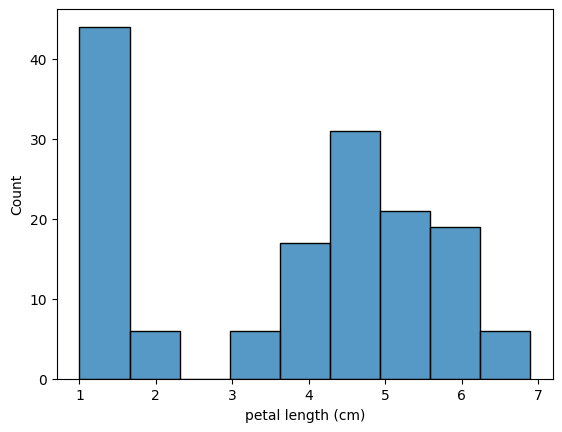

In [ ]:
# create simple histogram for petal length
sns.histplot(data=iris_df, x="petal length (cm)");

The above histogram in it's simplest form doesn't offer any benefit to the viewer. To improve this, several parameters can be specified in the code:
1. Hue: Applying 'species' here will colour code depending on the species
2. Binwidth: Changing this figure will increase or reduce the number of bins to help determine a trend 

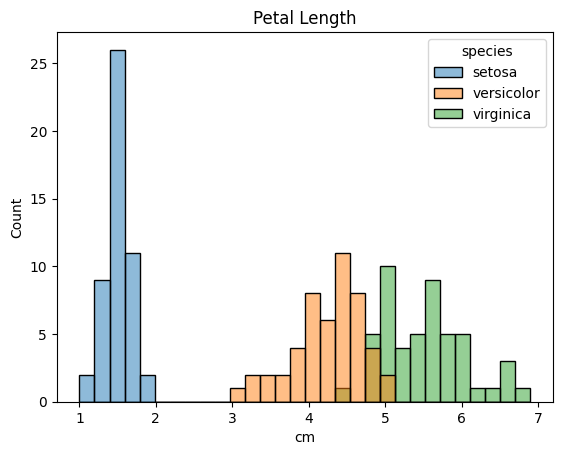

In [44]:
# Applying 'hue' and 'binwidth' parameters in the histogram
# source: https://seaborn.pydata.org/generated/seaborn.histplot.html

# petal length histogram
sns.histplot(data=iris_df, x="petal length (cm)", hue = 'species', binwidth=0.2)

# add title
plt.title('Petal Length')

# add x-axis label
plt.xlabel('cm');


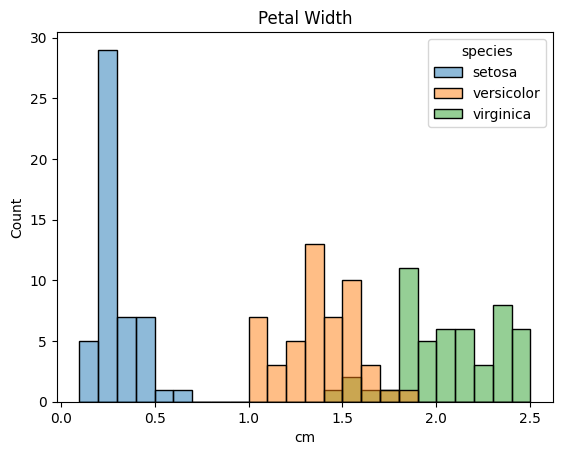

In [45]:
# repeat for petal width histogram
sns.histplot(data=iris_df, x="petal width (cm)", hue = 'species', binwidth=0.1)
plt.title('Petal Width')
plt.xlabel('cm');

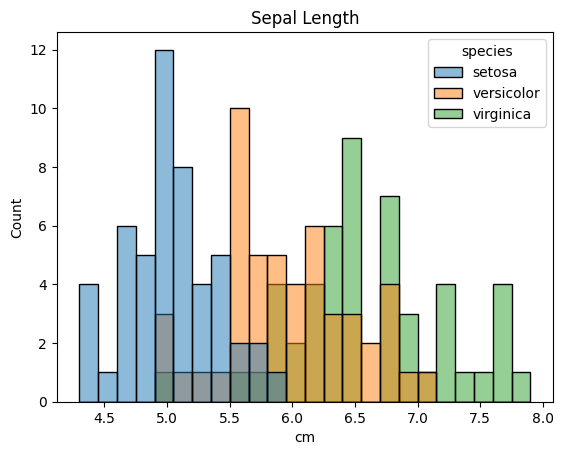

In [46]:
# repeat for sepal length histogram
sns.histplot(data=iris_df, x="sepal length (cm)", hue = 'species', binwidth=0.15)
plt.title('Sepal Length')
plt.xlabel('cm');

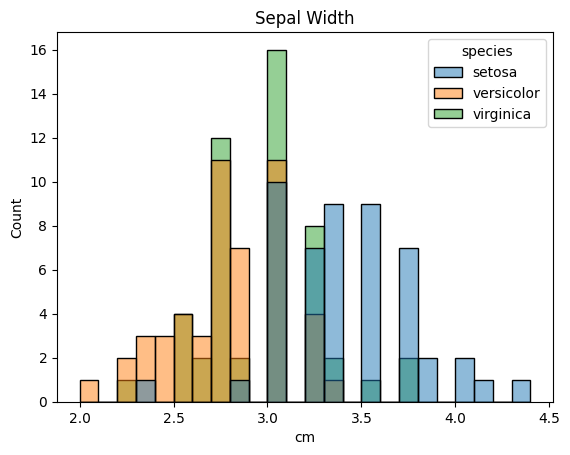

In [47]:
# repeat for sepal width histogram
sns.histplot(data=iris_df, x="sepal width (cm)", hue = 'species', binwidth=0.1)
plt.title('Sepal Width')
plt.xlabel('cm');

Per the above source, and as can be seen in the plotted histograms, the parameters can be adjusted greatly to help provide a plot which offers beneficial visual infomration. For this data set, it is noticeable that the petal width and petal length can be used to determine if the species is Setosa.

# Task 5: Scatter Plot

The 2 features selected for analysis are sepal length and sepal width. 

To create the scatter plot, the measurements for each feature must be specified. As per below, it can be seen that column 0 is the sepal lenghth, with column 1 being the sepal width

In [19]:
# verification of column numbers
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Knowing the columns, the scatter plot can be created, applying sepal length (column 0) measurements on the x-axis, and sepal width (column 1) on the y-axis

To differentiate the three species, colours can also be applied against the 3 different species, or targets as specified in the code

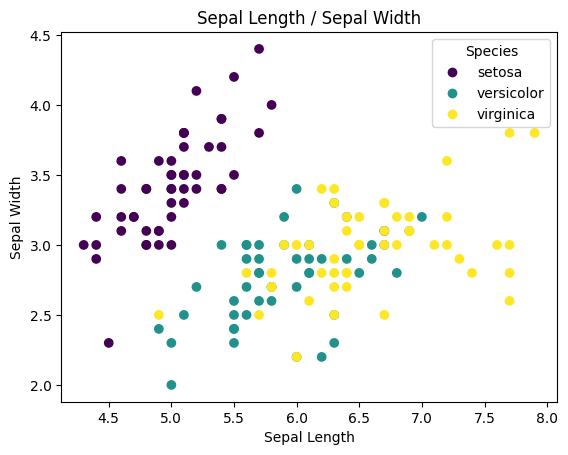

In [60]:
# Create a figure and an axis.
fig, ax = plt.subplots()

# Scatter plot creation specifying:
# x-axis (column 0 data),
# y-axis (column 1 data),
# and the plot colours related to the species
scatter = ax.scatter(iris.data[:,0], iris.data[:,1], c = iris.target)

# Apply axes labels and title.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# Add a legend
# To create a legend based off the different colour species,
# the code needs to specify target names (species in this case) are to be referenced
# source: https://www.statology.org/matplotlib-scatterplot-legend/
ax.legend(scatter.legend_elements()[0], iris.target_names, title = 'Species');


As with the histogram, the above plot can be modifed to adjust how it presents the information, but even in the above form, it can be seen that with the exception of a single outlier, the rest of the Setosa species are very clustered, following a trend of shorter sepal length with a larger width. A similar differentiation can not be applied to the Versicolor and Virginica species, as their plots are general mixed and overlapping.

# Task 6: Analyze Relationship

Prior to analyzing the relationship through line regression, in order to keep the formulas clearer, the x-axis measurements from above will be defined as 'x', and the y-axis as 'y'.

In [21]:
# x-axis values
x = iris.data[:,0]

# y-axis values
y = iris.data[:,1]

The previous scatter plot can now be recreated, using the same method as in task 5, but calling out 'x' and 'y for the relevant data to keep the code visually clearer.

A regression line will also be applied using numpy.polyfit

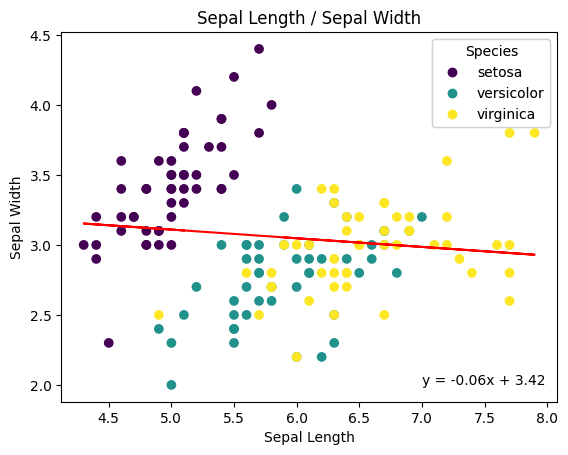

In [65]:
# Create scatter plot
fig, ax = plt.subplots()

ax.scatter(x, y, c = iris.target)

# Setting plot title and axes labels.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# legend for the scatter plot.
first_legend = ax.legend(scatter.legend_elements()[0], iris.target_names, title = 'Species')

# Using polyfit to fit a line to the data
m, c = np.polyfit(x, y, 1)

# adding regression line
regline, = ax.plot(x, m * x + c, color = "red")

# source for adding second legend to plot:
# https://www.geeksforgeeks.org/placing-two-different-legends-on-the-same-graph-with-matplotlib/

ax.add_artist(first_legend)
# second_legend = plt.legend(handles = [regline], loc = 'lower right') # to solve cause of error
ax.text(7, 2, f'y = {m:.2f}x + {c:.2f}'); # line formula captured while second legend issue is resolved



From the above plot, it can be seen that given the significant variation of points accross the three different species, adding the regression does not offer an effective means to determine one sepal feature based off the other. The line itself is easily added to the plot using polyfit, from which the gradient (m) and y-intercept (c) can be determined. 

# Task 7: Analyze Class Distribution

Creating boxplots for the petal length of each of the 3 species using pyplot firstly requires separation of the necessary data.

In [66]:
# Separate the dataset to have solely petal length, and species
column = iris_df[['petal length (cm)' , 'species']]

# Then from said column, create a group with only the setosa measurements
setosa_grp = column.loc[iris_df['species'] == 'setosa']

# Then separate the petal length column
setosa_pet_lt = setosa_grp['petal length (cm)']

# Repeat above steps for the remaining 2 species
versicolor_grp = column.loc[iris_df['species'] == 'versicolor']
versicolor_pet_lt = versicolor_grp['petal length (cm)']
virginica_grp = column.loc[iris_df['species'] == 'virginica']
virginica_pet_lt = virginica_grp['petal length (cm)']

With the 3 groups created; 'setosa_pet_lt', 'versicolor_pet_lt', and 'virginica_pet_lt', a single plot for the 3 sets can be created.

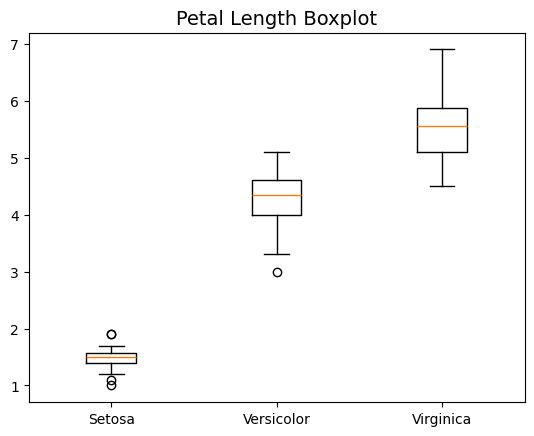

In [79]:
# Create figure, axis.
fig, ax = plt.subplots()

# Specify 3 groups for plotting
plot_data = ([setosa_pet_lt, versicolor_pet_lt, virginica_pet_lt])

# Set x-axis labels
# Source: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py
labels = ['Setosa', 'Versicolor', 'Virginica']

# Add title.
ax.set_title('Petal Length Boxplot', fontsize = 14)

# Show boxplot
ax.boxplot(plot_data, tick_labels = labels);


The above is a very long method for what would be considered a regular task. A much more effective solution would be to use seaborn.

source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

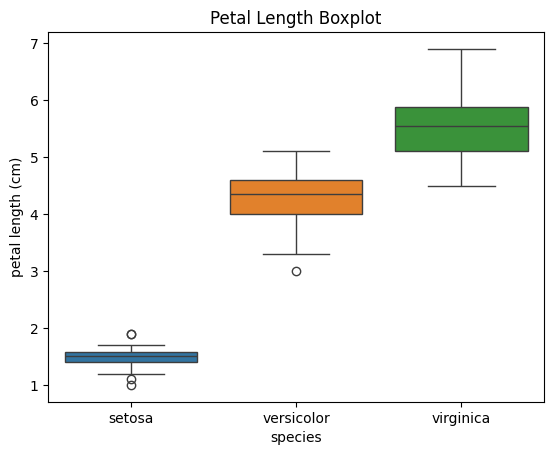

In [89]:
# Create boxplot from the dataframe iris_df
# Specify X as the species, and Y as the petal length.
# Add title source: https://www.statology.org/seaborn-title/
sns.boxplot (x = 'species', y = "petal length (cm)", data=iris_df, hue = 'species').set(title = 'Petal Length Boxplot')
plt.show;

# Task 8: Compute Correlations

Determining the correlation coefficients is easily done, once the columns of the dataframe are specified
Source: https://stackoverflow.com/questions/74538936/how-to-use-pandas-dataframe-corr-with-only-a-specific-number-of-columns

In [ ]:
# Specify columns from dataframe and determing correlation coefficients
correl = iris_df.iloc[: , 0:4].corr() 

# Print coefficients
print(correl)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


The above code can be seen to generate a 4 by 4 matrix, in which the relationship between one feature and another are easily determined. Another way to display the same information is through a heatmap. This can be done using matplotlib.

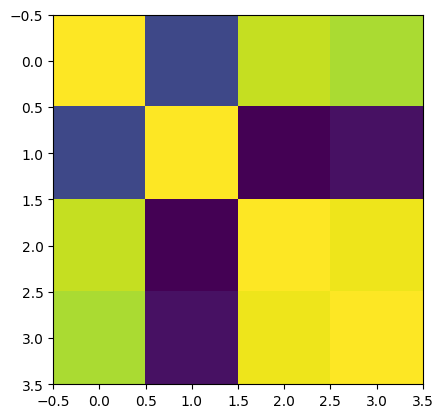

In [ ]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
hmap = ax.imshow(correl)

# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap

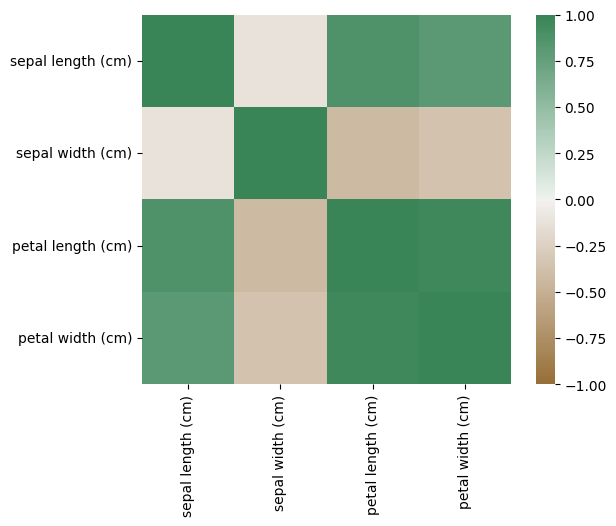

In [27]:
# https://www.w3schools.com/datascience/showpython.asp?filename=demo_stat_corr_matrix
axis_corr = sns.heatmap(correl, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50, 500, n=500), square=True)

plt.show()

# Task 9: Linear Regression

In [28]:
fit = sp.stats.linregress(x, y)

fit

LinregressResult(slope=np.float64(-0.061884797964144145), intercept=np.float64(3.418946836103816), rvalue=np.float64(-0.11756978413300208), pvalue=np.float64(0.15189826071144782), stderr=np.float64(0.04296698792989742), intercept_stderr=np.float64(0.2535622689351081))

In [29]:
rval = fit.rvalue**2

rval

np.float64(0.013822654141080708)

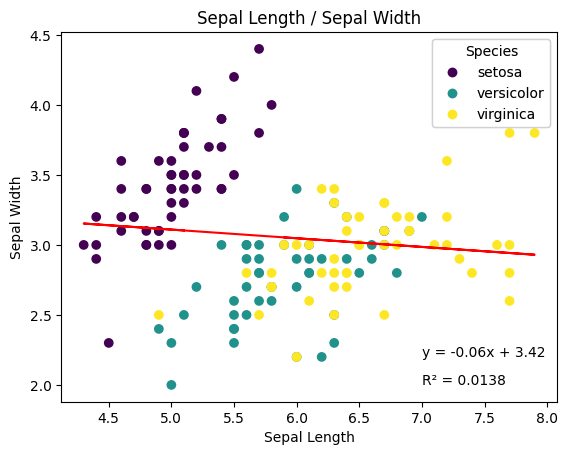

In [30]:
# duplicate code from scatter plot creation in task 6
m, c = np.polyfit(x, y, 1)

fig, ax = plt.subplots()

ax.scatter(x, y, c = iris.target)

# Setting plot title and axis labels.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

first_legend = ax.legend(scatter.legend_elements()[0], iris.target_names, title = 'Species')

regline, = ax.plot(x, m * x + c, color = "red")

ax.add_artist(first_legend)

ax.text(7, 2.2, f'y = {m:.2f}x + {c:.2f}')

# Add R² value to plot
ax.text(7, 2, f'R² = {rval:.4f}');

# Task 10: Pairplot

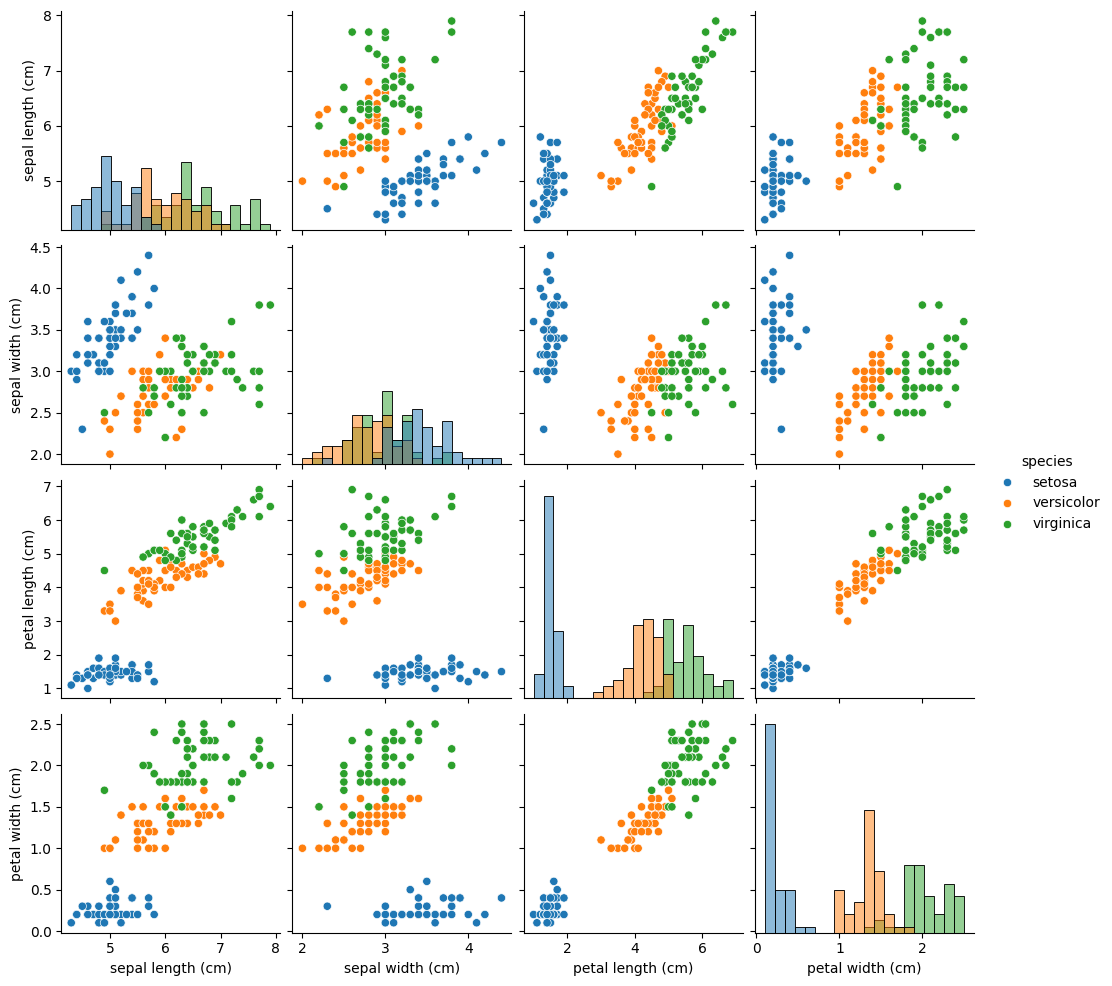

In [31]:
sns.pairplot(iris_df, hue = 'species', diag_kind = 'hist', diag_kws = {'bins' : 20})
plt.show;

# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://builtin.com/articles/seaborn-pairplot
# source for bins solution:https://stackoverflow.com/questions/59696426/how-to-change-the-number-of-bins-in-seaborns-pairplot-function

## End